### READ

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/dataset_avaliacoes.csv')
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo

In [3]:
df.shape

(15501, 4)

In [4]:
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

### BAG OF WORDS

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']
vectorizer = CountVectorizer()

bag_of_words = vectorizer.fit_transform(texto)
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [7]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names_out())
matriz_esparsa

comprei  produto  ruim  um  ótimo
0        1        1     0   1      1
1        1        1     1   1      0

In [8]:
vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 23352)


In [9]:
vectorizer = CountVectorizer(lowercase=False, max_features=50) #limita a 50 features
bag_of_words = vectorizer.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 50)


In [10]:
matriz_esparsa_avaliacoes = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names_out())
matriz_esparsa_avaliacoes

Não  Produto  ainda  antes  as  até  bem  bom  chegou  com  ...  \
0        0        0      0      0   0    0    0    0       0    0  ...   
1        0        0      0      0   0    0    0    0       0    0  ...   
2        0        0      0      0   0    0    0    0       0    0  ...   
3        0        0      0      0   0    0    0    0       0    0  ...   
4        0        0      0      0   0    0    1    0       0    0  ...   
...    ...      ...    ...    ...  ..  ...  ...  ...     ...  ...  ...   
15496    0        0      0      0   0    0    0    0       0    0  ...   
15497    0        0      0      0   0    0    0    0       0    0  ...   
15498    0        0      0      0   0    0    0    0       0    0  ...   
15499    0        1      0      1   0    0    0    1       1    0  ...   
15500    0        0      0      0   0    0    0    0       0    0  ...   

       qualidade  que  recebi  recomendo  se  sem  tem  um  uma  veio  
0              0    0       0          1   0    0    0   0    0     0  
1              0    0       0          0   1    0    0   0    0     0  
2              0    0       0          0   0    0    0   0    0     0  
3              0    1       0          0   0    0    0   0    0     0  
4              1    2       0          0   0    0    0   0    0     0  
...          ...  ...     ...        ...  ..  ...  ...  ..  ...   ...  
15496          0    0       0          1   0    0    0   0    0     0  
15497          0    1       0          0   0    0    1   0    0     0  
15498          0    0       0          0   0    0    0   1    0     0  
15499          0    0       0          0   0    0    0   0    0     0  
15500          0    0       0          0   0    0    0   0    0     0  

[15501 rows x 50 columns]

### TRAIN TEST SPLIT ###

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(bag_of_words, df.sentimento, random_state=4978)

In [13]:
from sklearn.linear_model import LogisticRegression


In [14]:
regressa_logistica = LogisticRegression()
regressa_logistica.fit(xtrain, ytrain)
acuracia = regressa_logistica.score(xtest, ytest)
print('Acurácia: ', acuracia)

Acurácia:  0.7982456140350878


### MÃO NA MASSA

In [15]:
def classificar_texto(texto, coluna_texto, sentimento):

    # 1. Separar os dados de texto (X) e os rótulos (y)
    x = texto[coluna_texto]
    y = texto[sentimento]

    # 2. Dividir os dados em conjuntos de treino e teste
    x_train, x_test, y_train, y_test = train_test_split( x, y, random_state=4978 )

    # 3. Inicializar o vetorizador com seus parâmetros originais.
    vectorizer = CountVectorizer(lowercase=False, max_features=50)

    # 4. Ajustar o vetorizador e transformar os dados de TREINO.
    x_train = vectorizer.fit_transform(x_train)

    # 5. Apenas transformar os dados de TESTE.
    # Usamos o vocabulário já aprendido na etapa anterior.Onde o resultado é o novo xtest.
    x_test = vectorizer.transform(x_test)

    # 6. Treinar o modelo de Regressão Logística com os dados vetorizados.
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(x_train, y_train)

    # 7. Calcular a acurácia usando o conjunto de teste.
    acuracia = regressao_logistica.score(x_test, y_test)
    
    print(f'Acurácia: {acuracia:.2f}')


### WORD CLOUD

In [16]:
from wordcloud import WordCloud

In [17]:
todas_palavras = [text for text in df.avaliacao]

In [18]:
todas_palavras = ' '.join([text for text in df.avaliacao])
print(todas_palavras)

Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancelam

In [19]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

In [20]:
import matplotlib.pyplot as plt

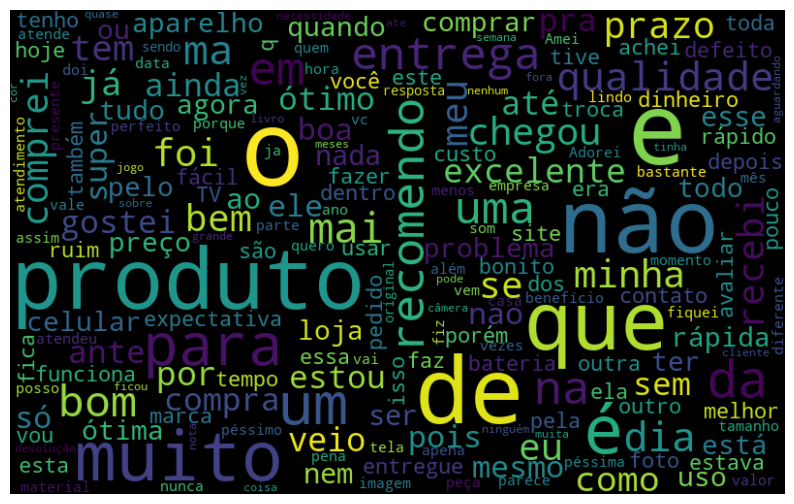

In [21]:
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
#separando por sentimento


def nuvem_por_sentimento( texto, coluna_texto, sentimento):
    texto_sentimento = texto.query(f'sentimento == "{sentimento}"')[coluna_texto]

    texto_unido = ' '.join(texto_sentimento)

    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()


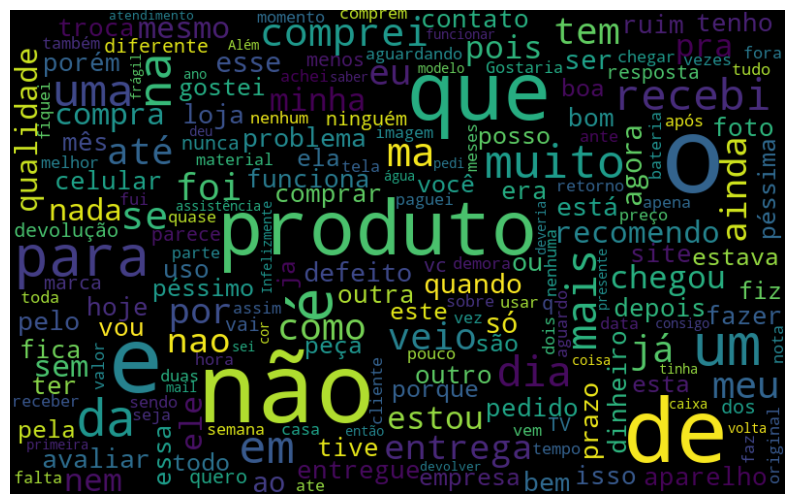

In [23]:
nuvem_por_sentimento(df, 'avaliacao', 'negativo')

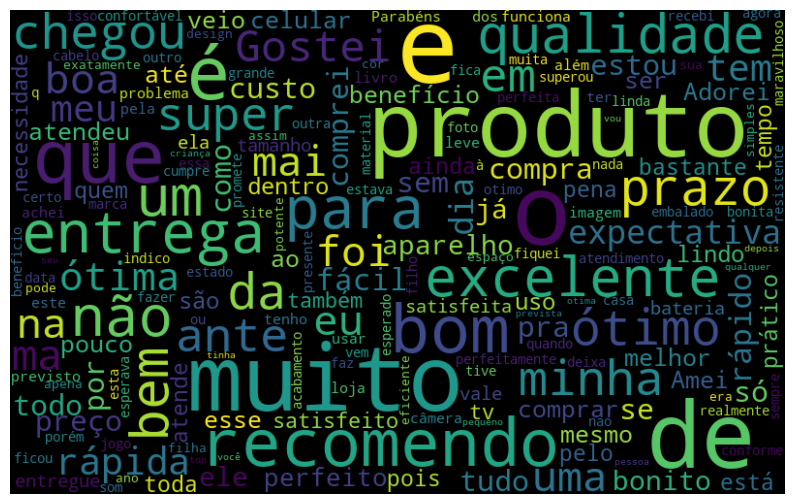

In [24]:
nuvem_por_sentimento(df, 'avaliacao', 'positivo')

### TOKENIZAÇÃO

1. Separar frases em palavras
2. Calcular a frequencia de cada palavra
3. Entender a distribuição
4. Remover palavras com baixo vaor semantico (preposições, artigos etc)

In [25]:
print(todas_palavras)

Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancelam

In [26]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\pbi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\pbi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\pbi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\pbi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\pbi\AppData\Roaming\nltk_data...
[nltk_data]

True

In [27]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
token_frase = tokenizer.tokenize(todas_palavras)
token_frase

['Esse',
 'smartphone',
 'superou',
 'minhas',
 'expectativas,',
 'recomendo',
 'o',
 'cheiro',
 'e',
 'muito',
 'desagradavel!!',
 'pra',
 'quem',
 'se',
 'incomoda',
 'nao',
 'recomendoo..',
 'Eu',
 'fiz',
 'a',
 'compra',
 'a',
 'loja',
 'não',
 'entregou',
 'o',
 'produto,',
 'a',
 'compra',
 'foi',
 'feita',
 'no',
 'cartão',
 'de',
 'credito',
 'e',
 'ate',
 'o',
 'momento',
 'a',
 'loja',
 'também',
 'nao',
 'me',
 'devolveu',
 'o',
 'valor',
 'da',
 'compra.',
 'Atendeu',
 'minhas',
 'expectativas,',
 'só',
 'achei',
 'a',
 'luz',
 'ruim,',
 'mas',
 'nada',
 'que',
 'dificulte',
 'seu',
 'funcionamento.',
 'Gostei',
 'muito,',
 'só',
 'achei',
 'que',
 'ficou',
 'a',
 'desejar',
 'a',
 'qualidade',
 'das',
 'fotos.',
 'Achei',
 'que',
 'fosse',
 'bem',
 'melhor',
 '.',
 'Comprei',
 'o',
 'produto',
 'e',
 'ñ',
 'tinha',
 'para',
 'entrega',
 'isso',
 'não',
 'foi',
 'legal!!!!!!',
 'o',
 'produto',
 'pode',
 'até',
 'ser',
 'bom',
 ',mais',
 'só',
 'posso',
 'avalia-lo',
 'depo

In [28]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [29]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})
df_frequencia.head()

Palavra  Frequência
0           Esse         101
1     smartphone          33
2        superou          90
3         minhas         533
4  expectativas,          79

In [30]:
df_frequencia.nlargest(columns='Frequência', n=5)

Palavra  Frequência
8        e       11813
6        o       10865
29      de       10280
19       a        8873
46     que        7657

In [31]:
import seaborn as sns

C:\Users\pbi\AppData\Local\Temp\ipykernel_12984\2841884492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequência', n=20),


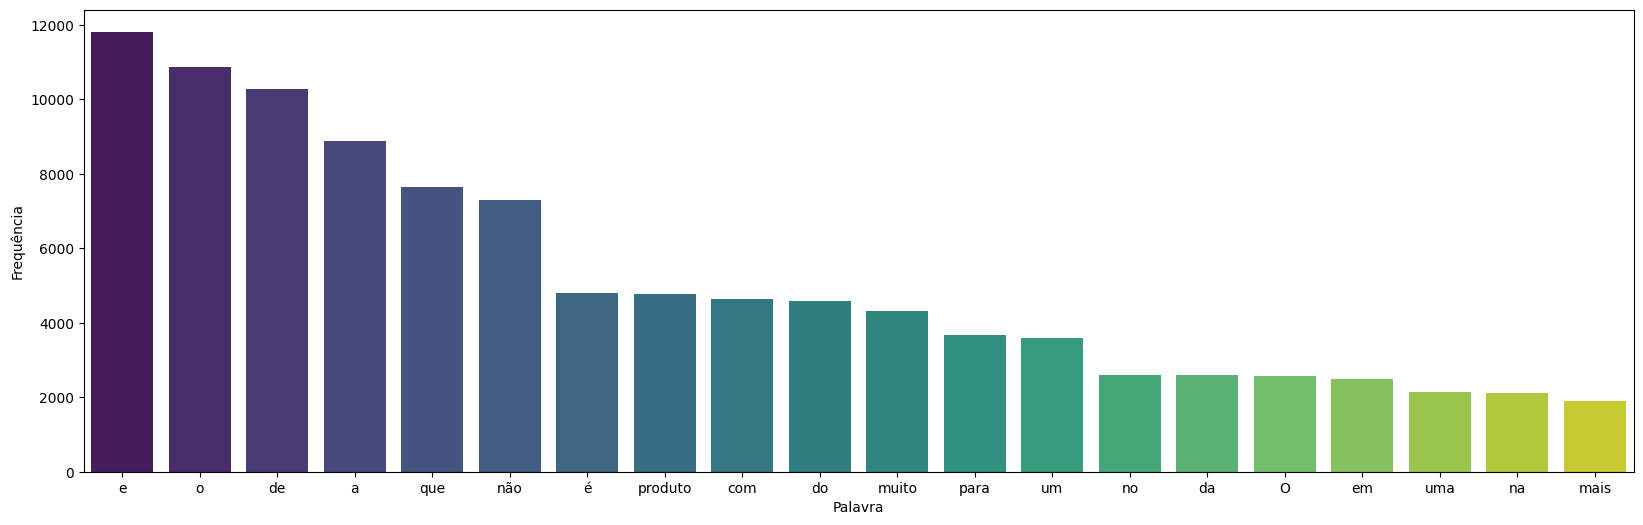

In [32]:
plt.figure(figsize=(20,6))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequência', n=20),
                 x='Palavra', y='Frequência', palette='viridis')
plt.show()

### MÃO NA MASSA

In [33]:
def grafico_frequencia(texto, coluna_texto, quantidade):  
    # Juntando todos os textos em uma única string
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    
    # Calculando a frequência das palavras
    token_espaco = nltk.tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    
    # Criando um DataFrame com as palavras e suas frequências
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                  "Frequência": list(frequencia.values())})
    
    # Selecionando as palavras mais frequentes
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    
    # Criando o gráfico de barras
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", palette="viridis")
    ax.set(ylabel="Contagem")
    
    # Exibindo o gráfico
    plt.show()

C:\Users\pbi\AppData\Local\Temp\ipykernel_12984\3477229465.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", palette="viridis")


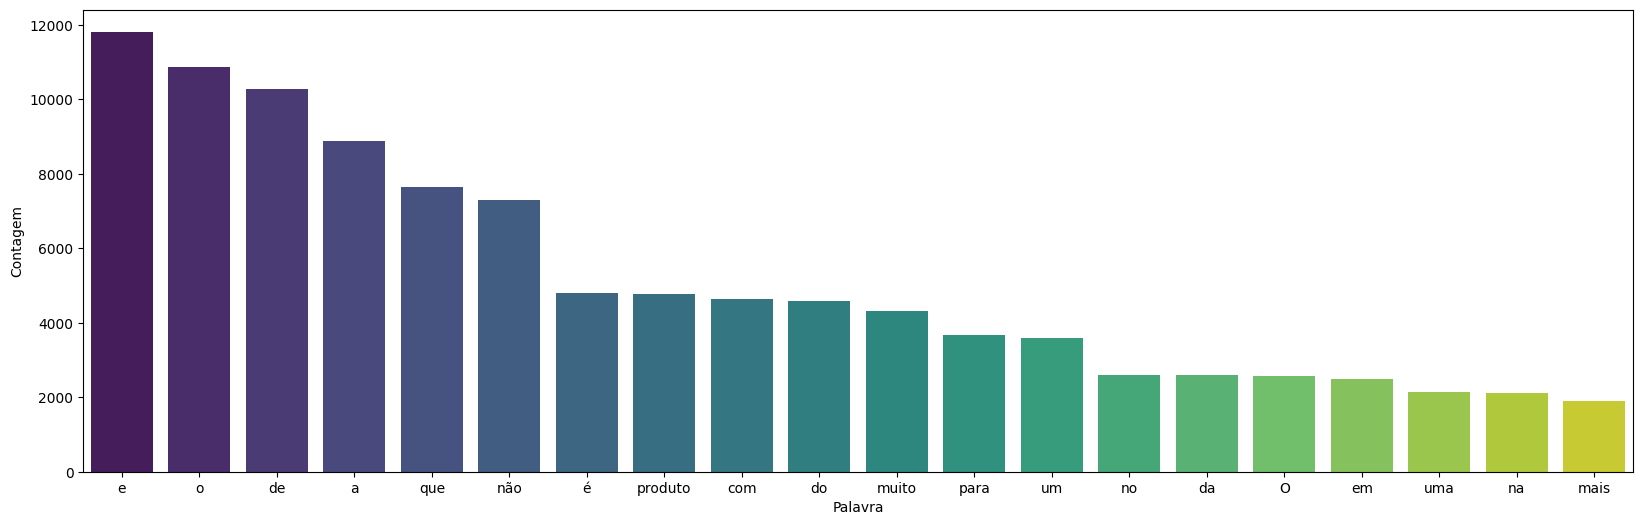

In [34]:
grafico_frequencia(df, 'avaliacao', 20)

### STOPWORDS

1. Remover palavras irrelevantes

In [35]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [36]:
frase_processada = []

for opiniao in df.avaliacao:
    palavras_texto = tokenizer.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))

df['frase_processada1'] = frase_processada

In [37]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                  frase_processada1  
0   positivo    Esse smartphone superou expectativas, recomendo  
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...  
2   negativo  Eu fiz compra loja entregou produto, compra fe...  
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...  
4   positivo  Gostei muito, achei ficou desejar qualidade fo...

In [38]:
def classificar_texto(text, avaliacao, sentimento):
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(text.avaliacao)

    xtrain, xtest, ytrain, ytest = train_test_split(bag_of_words, text.sentimento, random_state=4978)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(xtrain, ytrain)
    acuracia = regressao_logistica.score(xtest, ytest)
    print(f'Acurácia: {acuracia:.2f}')

In [39]:
classificar_texto(df, 'frase_processada1', 'sentimento')

Acurácia: 0.80


In [40]:
def grafico_frequencia(texto, coluna_texto, quantidade):  
    # Juntando todos os textos em uma única string
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    
    # Calculando a frequência das palavras
    token_espaco = nltk.tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    
    # Criando um DataFrame com as palavras e suas frequências
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                  "Frequência": list(frequencia.values())})
    
    # Selecionando as palavras mais frequentes
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    
    # Criando o gráfico de barras
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", palette="viridis")
    ax.set(ylabel="Contagem")
    
    # Exibindo o gráfico
    plt.show()

C:\Users\pbi\AppData\Local\Temp\ipykernel_12984\3477229465.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", palette="viridis")


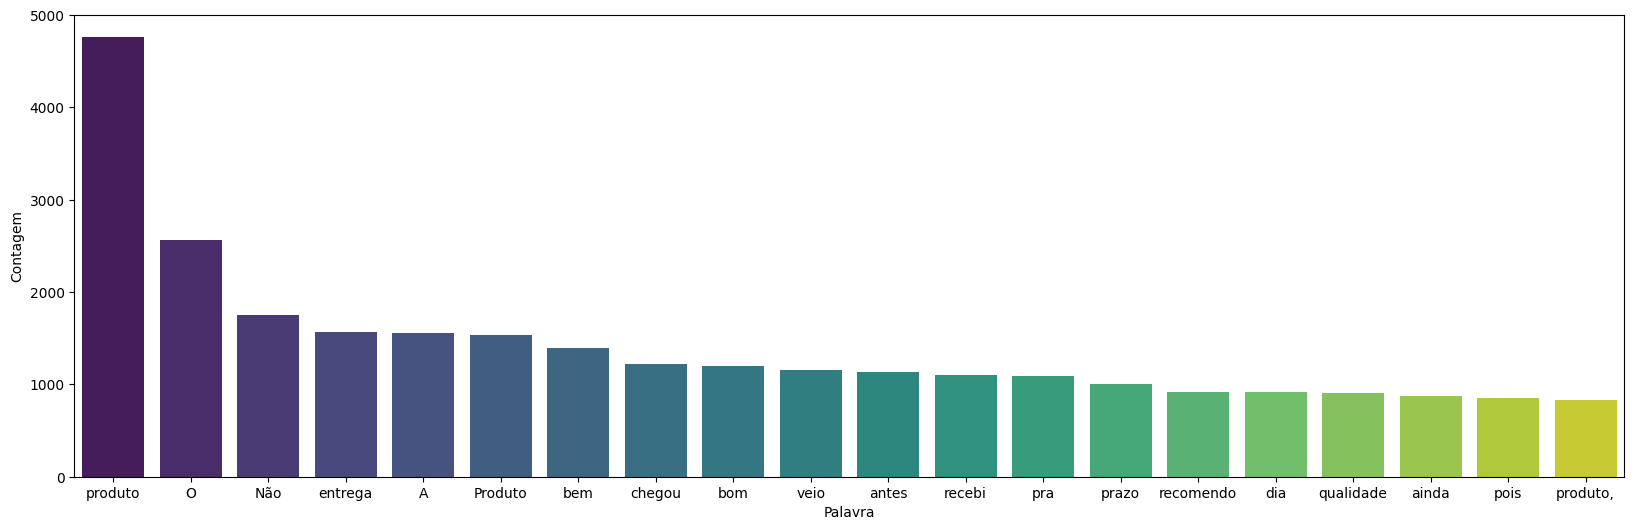

In [41]:
grafico_frequencia(df, 'frase_processada1', 20)

### PONTUAÇÃO

In [42]:
token_pontuacao = nltk.tokenize.WordPunctTokenizer()

frase_processada_2 = []
for opiniao in df['frase_processada1']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra .isalpha() and palavra not in palavras_irrelevantes]
    frase_processada_2.append(' '.join(nova_frase))

df['frase_processada2'] = frase_processada_2

In [43]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                  frase_processada1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                   frase_processada2  
0     Esse smartphone superou expectativas recomendo  
1    cheiro desagradavel pra incomoda nao recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

C:\Users\pbi\AppData\Local\Temp\ipykernel_12984\3477229465.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", palette="viridis")


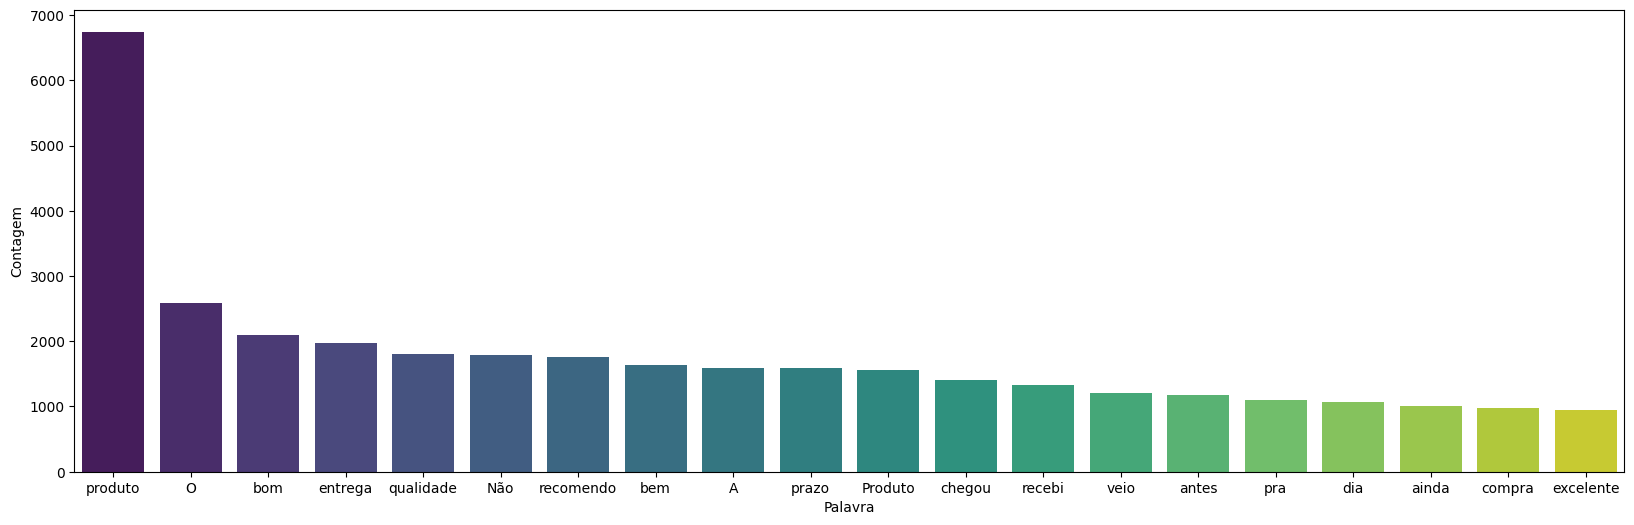

In [44]:
grafico_frequencia(df, 'frase_processada2', 20)

### ACENTUAÇÕES

In [45]:
import unidecode

In [46]:
sem_acentos = [unidecode.unidecode(texto) for texto in df['frase_processada2']]
stop_words_sem_acentos = [unidecode.unidecode(palavra) for palavra in palavras_irrelevantes]

In [47]:
df['frase_processada3'] = sem_acentos

frase_processada_3 = []
for opiniao in df['frase_processada3']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stop_words_sem_acentos]
    frase_processada_3.append(' '.join(nova_frase))

df['frase_processada3'] = frase_processada_3

In [48]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                  frase_processada1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                   frase_processada2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                   frase_processada3  
0     Esse smartphone superou expectativas recomendo  
1        cheiro desagradavel pra incomoda recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

C:\Users\pbi\AppData\Local\Temp\ipykernel_12984\3477229465.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", palette="viridis")


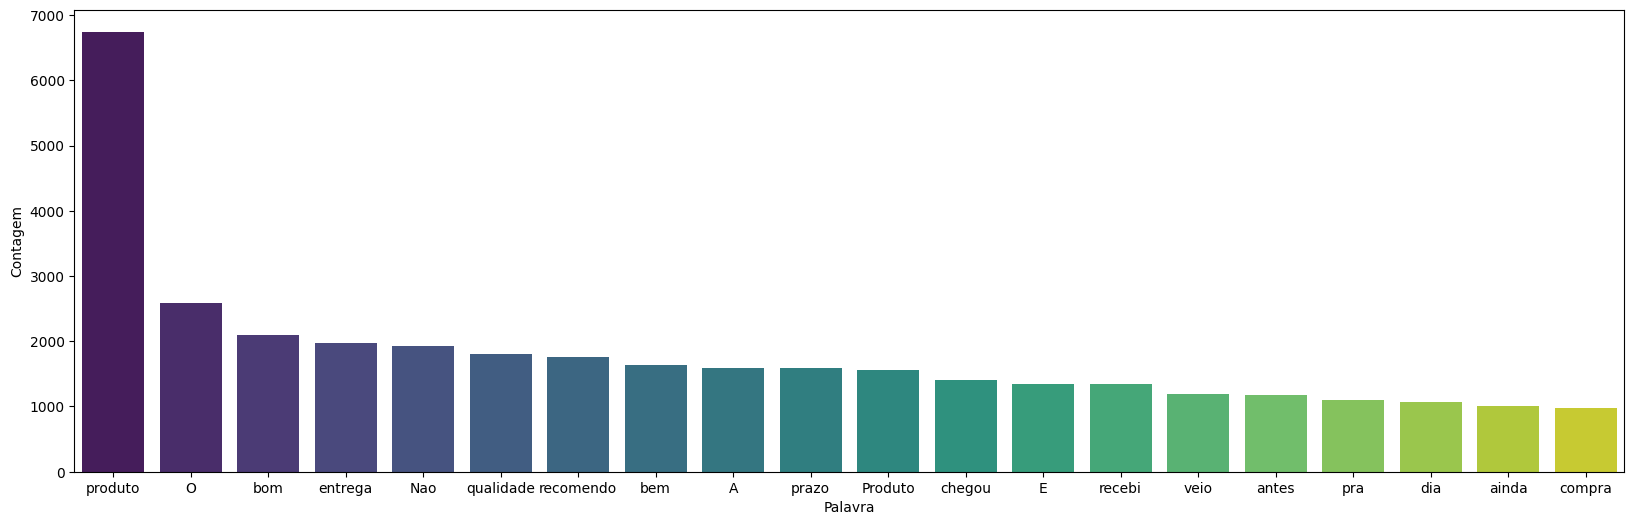

In [49]:
grafico_frequencia(df, 'frase_processada3', 20)

### UNIFORMIZAÇÃO

In [50]:
frase_processada_4 = []
for opiniao in df['frase_processada3']:
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if opiniao not in stop_words_sem_acentos]
    frase_processada_4.append(' '.join(nova_frase))

df['frase_processada4'] = frase_processada_4

In [51]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                  frase_processada1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                   frase_processada2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                   frase_processada3  \
0     Esse smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                   frase_processada4  
0     esse smartphone superou expectativas recomendo  
1        cheiro desagradavel pra incomoda recomendoo  
2  eu fiz compra loja entregou produto compra fei...  
3  atendeu expectativas achei luz ruim nada dific...  
4  gostei achei ficou desejar qualidade fotos ach...

In [52]:
classificar_texto(df, 'frase_processada4', 'sentimento')

Acurácia: 0.80


C:\Users\pbi\AppData\Local\Temp\ipykernel_12984\3477229465.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", palette="viridis")


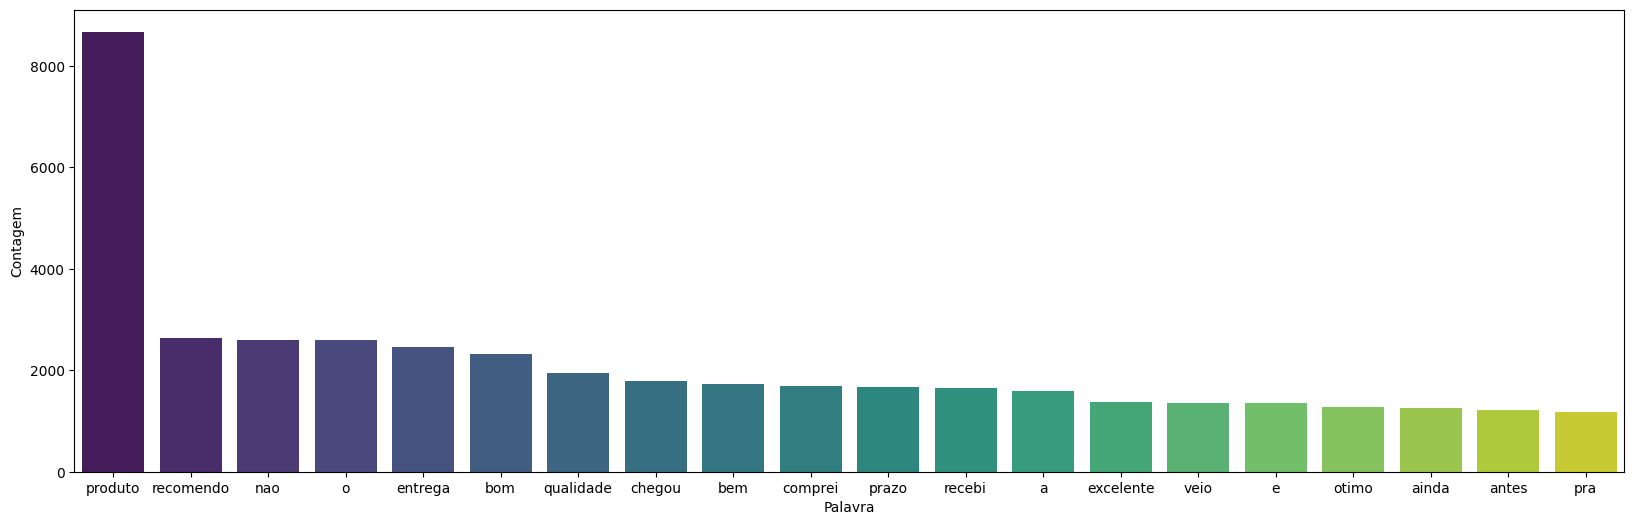

In [53]:
grafico_frequencia(df, 'frase_processada4', 20)

### MÃO NA MASSA

In [54]:
df_atividade = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/avaliacoes_atividade.csv', sep=',')
df_atividade.head()

ID_avaliacao                                          avaliacao
0          5775  Gostei muito do produto! Entrega rápida e efic...
1          7734  Produto veio com defeito, muito insatisfeito. ...
2          3756  Excelente qualidade, atendeu todas as minhas e...
3          6568            A entrega atrasou, mas o produto é bom.
4          6266  Péssimo atendimento e produto de baixa qualidade!

In [55]:
from nltk import tokenize

palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

frase_processada = []
for opiniao in df_atividade["avaliacao"]:
    # Tokenizar a opinião
    token_pontuacao = tokenize.WordPunctTokenizer()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    # Filtrar palavras irrelevantes e remover pontuação usando isalpha()
    nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))

df_atividade["tratamentos"] = frase_processada

In [56]:
df_atividade.head()

ID_avaliacao                                          avaliacao  \
0          5775  Gostei muito do produto! Entrega rápida e efic...   
1          7734  Produto veio com defeito, muito insatisfeito. ...   
2          3756  Excelente qualidade, atendeu todas as minhas e...   
3          6568            A entrega atrasou, mas o produto é bom.   
4          6266  Péssimo atendimento e produto de baixa qualidade!   

                                       tratamentos  
0          Gostei produto Entrega rápida eficiente  
1  Produto veio defeito insatisfeito Não recomendo  
2   Excelente qualidade atendeu todas expectativas  
3                    A entrega atrasou produto bom  
4      Péssimo atendimento produto baixa qualidade

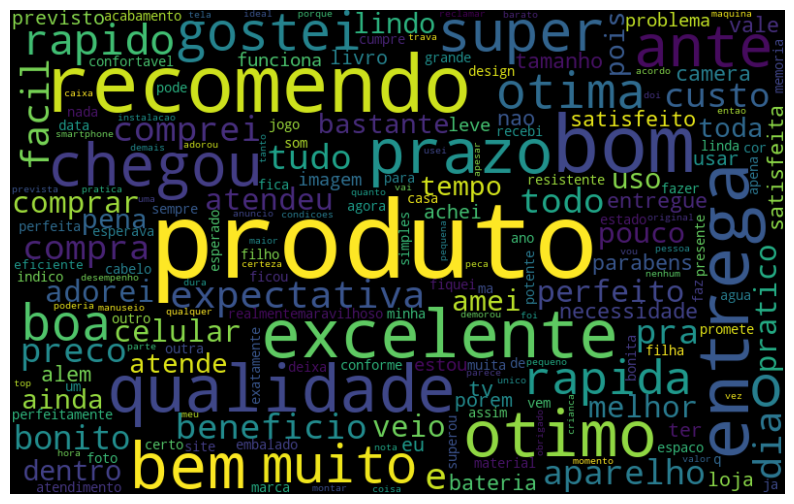

In [57]:
nuvem_por_sentimento(df, 'frase_processada4', 'positivo')

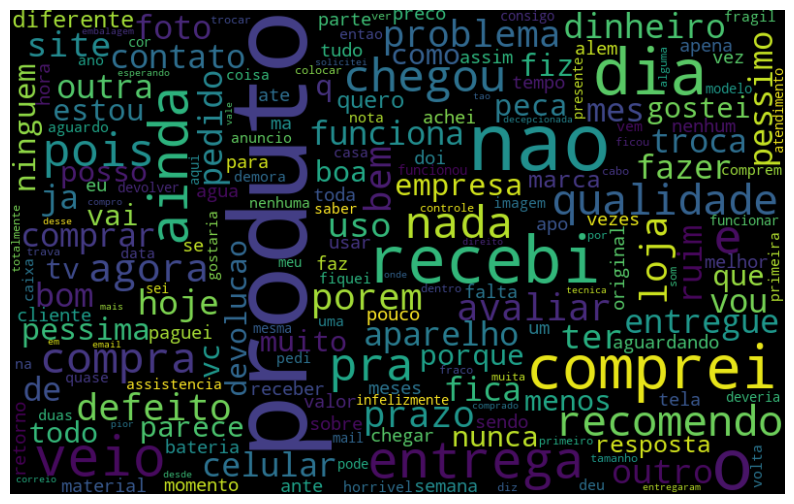

In [58]:
nuvem_por_sentimento(df, 'frase_processada4', 'negativo')

### STEMMING DE PALAVRAS

- Simplificação de palvras
- Extrai o radical

In [59]:
stemmer = nltk.stem.RSLPStemmer()

In [60]:
frase_processada_5 = []
for opiniao in df['frase_processada4']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
    frase_processada_5.append(' '.join(nova_frase))

df['frase_processada5'] = frase_processada_5

In [61]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                  frase_processada1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                   frase_processada2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                   frase_processada3  \
0     Esse smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                   frase_processada4  \
0     esse smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  eu fiz compra loja entregou produto compra fei...   
3  atendeu expectativas achei luz ruim nada dific...   
4  gostei achei ficou desejar qualidade fotos ach...   

                                   frase_processada5  
0                   ess smartphon super expect recom  
1              cheir desagrada pra incomod recomendo  
2  eu fiz compr loj entreg produt compr feit cart...  
3     atend expect ach luz ruim nad dificult funcion  
4         gost ach fic desej qual fot ach bem melhor

In [62]:
classificar_texto(df, 'frase_processada5', 'sentimento')

Acurácia: 0.80


### TF-IDF

- Calcula peso das palavras nas sentenças

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

tfidf_bruto = tfidf.fit_transform(df['avaliacao'])

x_train, x_test, y_train, y_test = train_test_split(tfidf_bruto, df['sentimento'], random_state=4978)
regressa_logistica.fit(x_train, y_train)

acuracia = regressa_logistica.score(x_test, y_test)
print(f'Acurácia: {acuracia:.4f}')

Acurácia: 0.7954


In [64]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

tfidf_tratados = tfidf.fit_transform(df['frase_processada5'])

x_train, x_test, y_train, y_test = train_test_split(tfidf_tratados, df['sentimento'], random_state=4978)
regressa_logistica.fit(x_train, y_train)

acuracia = regressa_logistica.score(x_test, y_test)
print(f'Acurácia: {acuracia:.4f}')

Acurácia: 0.8674


#### CAPTURANDO CONTEXTOS: N-grams

- Utilizando ngrams

In [65]:
from nltk import ngrams

tf_idf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1,2))

vetor_tfidf = tf_idf_50.fit_transform(df['frase_processada5'])
x_train, x_test, y_train, y_test = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressa_logistica.fit(x_train, y_train)
acuracia = regressa_logistica.score(x_test, y_test)
print(f'Acurácia: {acuracia:.4f}')

Acurácia: 0.8658


In [66]:
tf_idf_100 = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1,2))

vetor_tfidf = tf_idf_100.fit_transform(df['frase_processada5'])
x_train, x_test, y_train, y_test = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressa_logistica.fit(x_train, y_train)
acuracia = regressa_logistica.score(x_test, y_test)
print(f'Acurácia: {acuracia:.4f}')

Acurácia: 0.8922


In [67]:
tf_idf_1000 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1,2))

vetor_tfidf = tf_idf_1000.fit_transform(df['frase_processada5'])
x_train, x_test, y_train, y_test = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressa_logistica.fit(x_train, y_train)
acuracia = regressa_logistica.score(x_test, y_test)
print(f'Acurácia: {acuracia:.4f}')

Acurácia: 0.9234


In [68]:
pesos = pd.DataFrame(
    regressa_logistica.coef_[0].T,
    index=tf_idf_1000.get_feature_names_out())

pesos.nlargest(50, 0)

0
otim           7.832948
excel          7.268710
bom            5.355636
perfeit        4.970383
ador           4.923159
satisfeit      4.591015
rap            4.067628
recom          3.833085
lind           3.625971
maravilh       3.390422
ame            3.297279
gost           3.189360
surpreend      2.823100
expect         2.815363
sup            2.785181
bast           2.752231
bem            2.651960
boa            2.635267
muit bom       2.493709
facil          2.464769
gost produt    2.323475
top            2.320620
exat           2.313188
conhec         2.261970
otim produt    2.242638
parab          2.153700
ant            2.087329
ant praz       2.030442
bonit          2.010093
obrig          2.009065
facilit        1.945604
ideal          1.942752
amou           1.928011
necess         1.927085
incri          1.887865
unic           1.839772
atend          1.831949
produt excel   1.770728
tud            1.731321
produt bom     1.719479
so             1.715665
acord          1.669869
feliz          1.656108
cheg ant       1.631575
muit boa       1.598268
produt otim    1.563636
cust benefici  1.561290
am             1.561152
conform        1.556811
cert           1.551281

In [69]:
pesos.nsmallest(50, 0)

0
nao          -4.955212
pess         -4.432539
ruim         -4.142071
receb        -4.001386
frac         -3.499375
nao recom    -3.431350
horri        -3.110602
defeit       -3.037104
fragil       -2.841664
decepcion    -2.834794
devolv       -2.805835
vei          -2.607870
dinh         -2.585476
solt         -2.416101
pag          -2.371294
nao gost     -2.334707
quebr        -2.288814
tent         -2.225476
me           -2.224872
devoluca     -2.151063
inferi       -2.119194
pess qual    -2.034416
na           -2.007218
lig          -2.006031
baix qual    -1.983531
insatisfeit  -1.972204
ning         -1.969454
avali        -1.967917
receb produt -1.951447
troc         -1.918041
hoj          -1.910959
rasg         -1.886164
tr           -1.867274
mand         -1.863909
fal          -1.819166
lent         -1.806018
err          -1.788361
baix         -1.786907
porc         -1.774978
cancel       -1.753562
pi           -1.738891
queim        -1.735378
produt       -1.725063
regul        -1.695682
absurd       -1.681019
por          -1.669075
mal          -1.668842
arrepend     -1.662757
encaix       -1.662680
sai          -1.662506

### SALVANDO E CARREGANDO MODELO

In [70]:
import joblib

#joblib.dump(tf_idf_1000, 'tfidf_vectoraizer.pkl')
#joblib.dump(regressa_logistica, 'modelo_regressao_logistica.pkl')

In [ ]:
tfidf_carregado = joblib.load('tfidf_vectoraizer.pkl')
regressa_logistica_carregado = joblib.load('modelo_regressao_logistica.pkl')

### TRATAMENTO DE NOVOS DADOS

In [72]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
token_pontuacao = nltk.tokenize.WordPunctTokenizer()
stemmer = nltk.stem.RSLPStemmer()

def preprocessar_avaliacao(avaliacao):
    #passo 1
    tokens = token_pontuacao.tokenize(avaliacao)

    #passo 2
    frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]

    #passo 3
    frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]

    #passo 4
    frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada]

    #passo 5
    frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]

    return ' '.join(frase_processada)

In [73]:
# Novas avaliações para classificar
novas_avaliacoes = [
    "O produto é excelente e superou minhas expectativas!",
    "Muito ruim, não gostei nada do serviço prestado.",
    "A entrega foi rápida, mas o produto chegou danificado.",
    "Atendimento ao cliente foi ótimo, resolveram meu problema rapidamente.",
    "Não recomendo, qualidade péssima e preço alto."
]

In [75]:
novas_avaliacoes_processadas = [preprocessar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]
novas_avaliacoes_processadas

['produt excel super expect',
 'ruim gost nad serv prest',
 'entreg rap produt cheg danific',
 'atend client otim resolv problem rapid',
 'recom qual pess prec alt']

In [76]:
novas_avaliacoes_tfidf = tfidf_carregado.transform(novas_avaliacoes_processadas)

predicoes = regressa_logistica_carregado.predict(novas_avaliacoes_tfidf)

df_previsoes = pd.DataFrame({
    'Avaliação': novas_avaliacoes,
    'Predição': predicoes
})

df_previsoes

Avaliação  Predição
0  O produto é excelente e superou minhas expecta...  positivo
1   Muito ruim, não gostei nada do serviço prestado.  negativo
2  A entrega foi rápida, mas o produto chegou dan...  positivo
3  Atendimento ao cliente foi ótimo, resolveram m...  positivo
4     Não recomendo, qualidade péssima e preço alto.  negativo

### MÃO NA MASSA

In [79]:
df_url = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/novas_avaliacoes.csv')
df_url.head()

ID_avaliacao                                          avaliacao
0          8558  Até que o sabor é bom. Muito melhor que tomar ...
1          3553  Nossa sério, absurdo, compro o produto com rec...
2          5590                                Bom custo benefício
3          6617  Saboroso e nutritivo. Tem me salvado nos dias ...
4          7987  Fiquei decepcionada com a situação, a embalage...

In [80]:
novas_avaliacoes_mao_na_massa = [preprocessar_avaliacao(avaliacao) for avaliacao in df_url['avaliacao']]
novas_avaliacoes_mao_na_massa_tfidf = tfidf_carregado.transform(novas_avaliacoes_mao_na_massa)
predicoes_mao_na_massa = regressa_logistica_carregado.predict(novas_avaliacoes_mao_na_massa_tfidf)

df_resultado_mao_na_massa = pd.DataFrame({
    'Avaliação': df_url['avaliacao'],
    'Predição': predicoes_mao_na_massa
})

df_resultado_mao_na_massa

Avaliação  Predição
0   Até que o sabor é bom. Muito melhor que tomar ...  positivo
1   Nossa sério, absurdo, compro o produto com rec...  negativo
2                                 Bom custo benefício  positivo
3   Saboroso e nutritivo. Tem me salvado nos dias ...  positivo
4   Fiquei decepcionada com a situação, a embalage...  negativo
5   Uma unidade do pacote veio furada e vazou em t...  negativo
6      Comprei em junho mas o produto venceu em março  negativo
7   Gente, o meu chegou todo certinho, eu tava com...  positivo
8   Gosto muito desse produto, ótima qualidade, e ...  positivo
9   Esse produto veio na quantidade que eu não ped...  negativo
10    TODOS VIERAM COM VENCIMENTO DE 3 MESES ATRÁS!!!  negativo